<a href="https://colab.research.google.com/github/ab17254/ce802/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree, metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

sns.set_style('whitegrid')

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CE802_P2_Data.csv to CE802_P2_Data.csv
Saving CE802_P2_Test.csv to CE802_P2_Test.csv
User uploaded file "CE802_P2_Data.csv" with length 119990 bytes
User uploaded file "CE802_P2_Test.csv" with length 113062 bytes


In [3]:
data = pd.read_csv('/content/CE802_P2_Data.csv')
test = pd.read_csv('/content/CE802_P2_Test.csv')

In [4]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [5]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,NaN
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,NaN
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,NaN
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,NaN
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,NaN


In [6]:
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8         int64
F9       float64
F10      float64
F11      float64
F12      float64
F13        int64
F14      float64
F15      float64
Class       bool
dtype: object

In [7]:
cleanup = {'Class': {False: 0, True:1}}
data.replace(cleanup, inplace=True)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,0
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,0
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,1
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,1
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.7,33.90,5.80,6.62,10.71,362.58,-1.52,165,5.52,444.56,-1.96,15.30,10,6.93,8.76,0
1496,17.7,29.40,8.00,-0.48,3.54,-102.42,1.17,100,3.76,304.56,6.78,29.25,10,7.53,12.19,1
1497,11.7,2.13,-0.92,12.12,22.65,95.58,-0.57,10,8.47,76.56,-4.76,2.34,1,1.89,NaN,1
1498,11.7,2.94,0.64,11.68,17.49,146.58,1.47,20,8.57,116.56,-5.00,2.67,1,1.48,11.55,0


In [8]:
data['F15'].fillna(data['F15'].mean(), inplace=True)

In [9]:
features = {'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15'}

In [10]:
x = data.loc[:, features].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 15) (1500,)


In [11]:
x_test_data = test.loc[:, features].to_numpy()
print(x.shape)

(1500, 15)


In [12]:
#preprocessing of training data
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])
    y_train = y[train_indices]
    y_test = y[test_indices]


In [13]:
# preprocessing of test data
mean = np.nanmean(x_test_data)
x_test_data[np.isnan(x_test_data)] = mean
ss = StandardScaler()
x_test_fitted = ss.fit_transform(x_test_data)

In [14]:
print(x_test_fitted.shape)

(1500, 15)


## a) Investigate the performance of a number of machine learning procedures on this dataset.

### Decision Tree classifier

In [15]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
dt_pred = model_dt.predict(x_test)
print(confusion_matrix(y_test, dt_pred), '\n', classification_report(y_test, dt_pred))

[[133  38]
 [ 31  98]] 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       171
           1       0.72      0.76      0.74       129

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



#### Tuned Decision Tree classifier

In [54]:
min_samples_split_list = list(range(2,51))
dt_param_grid = {'min_samples_split':min_samples_split_list,
                 'criterion':['gini', 'entropy'],
                 'splitter':['best', 'random']}
dt_cv = GridSearchCV(model_dt, dt_param_grid, refit=True)
# dt_cv.get_params()
dt_cv.fit(x_train, y_train)
print(dt_cv.best_params_, dt_cv.best_score_)
dt_cv_pred = dt_cv.predict(x_test)
print(confusion_matrix(y_test, dt_cv_pred), '\n', classification_report(y_test, dt_cv_pred))

{'criterion': 'entropy', 'min_samples_split': 25, 'splitter': 'best'} 0.805
[[143  28]
 [ 22 107]] 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       171
           1       0.79      0.83      0.81       129

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



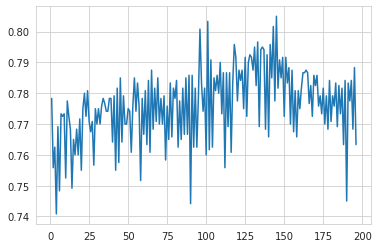

In [66]:
plt.plot(np.arange(1,197), dt_cv.cv_results_['mean_test_score'])

### KNN classifier

In [17]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
knn_pred = model_knn.predict(x_test)
print(confusion_matrix(y_test, knn_pred), '\n', classification_report(y_test, knn_pred))

[[139  32]
 [ 47  82]] 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       171
           1       0.72      0.64      0.67       129

    accuracy                           0.74       300
   macro avg       0.73      0.72      0.73       300
weighted avg       0.74      0.74      0.73       300



#### Tuned KNN classifier

In [56]:
knn_list = list(range(1,31))
knn_param_grid = {'n_neighbors':knn_list,
                  'weights':['uniform', 'distance'],
                  'algorithm': ['kd_tree', 'ball_tree', 'brute']}
knn_cv = GridSearchCV(model_knn, knn_param_grid, refit=True)
# knn_cv.get_params()
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_, knn_cv.best_score_)
knn_cv_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, knn_cv_pred), '\n', classification_report(y_test, knn_cv_pred))

{'algorithm': 'kd_tree', 'n_neighbors': 28, 'weights': 'distance'} 0.7699999999999999
[[146  25]
 [ 35  94]] 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       171
           1       0.79      0.73      0.76       129

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300



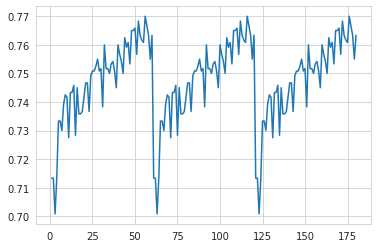

In [65]:
plt.plot(np.arange(1,181), knn_cv.cv_results_['mean_test_score'])

### Support Vector classifier

In [19]:
model_svc = SVC()
model_svc.fit(x_train, y_train)
svc_pred = model_svc.predict(x_test)
print(confusion_matrix(y_test, svc_pred), '\n', classification_report(y_test, svc_pred))

[[137  34]
 [ 20 109]] 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84       171
           1       0.76      0.84      0.80       129

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



#### Tuned Support Vector classifier

In [37]:
svc_param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel': ['poly', 'rbf']}
svc_cv = GridSearchCV(SVC(), svc_param_grid, refit=True)
# svc_cv.get_params()
svc_cv.fit(x_train, y_train)
print(svc_cv.best_params_, svc_cv.best_score_)
svc_cv_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, svc_cv_pred), '\n', classification_report(y_test, svc_cv_pred))

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'} 0.8766666666666666
[[159  12]
 [ 16 113]] 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       171
           1       0.90      0.88      0.89       129

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



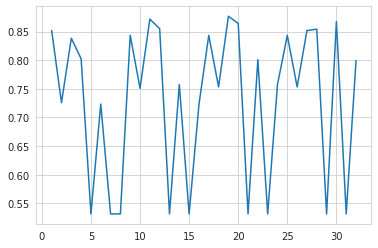

In [69]:
plt.plot(np.arange(1,33), svc_cv.cv_results_['mean_test_score'])

## b) Prediction on a hold-out test set

### Tuned Support Vector classifier

In [71]:
y_test_output = svc_cv.predict(x_test_fitted)
test['Class'] = y_test_output

In [73]:
test.groupby('Class').count()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
Class,,,,,,,,,,,,,,,
0,894,894,894,894,894,894,894,894,894,894,894,894,894,894,533
1,606,606,606,606,606,606,606,606,606,606,606,606,606,606,217


In [74]:
test.to_csv('CE802_P2_Test_Ouput.csv') #Change file name